# Compute the energy of the events

Here, we will compute the energy of the first trace of each event to extract features. For more information about the calculation, please read the report.

In [1]:
from tqdm.notebook import tqdm

import analysis
import catalog
import energy

tqdm.pandas()
catalog.display_parameters()

## Load the catalog

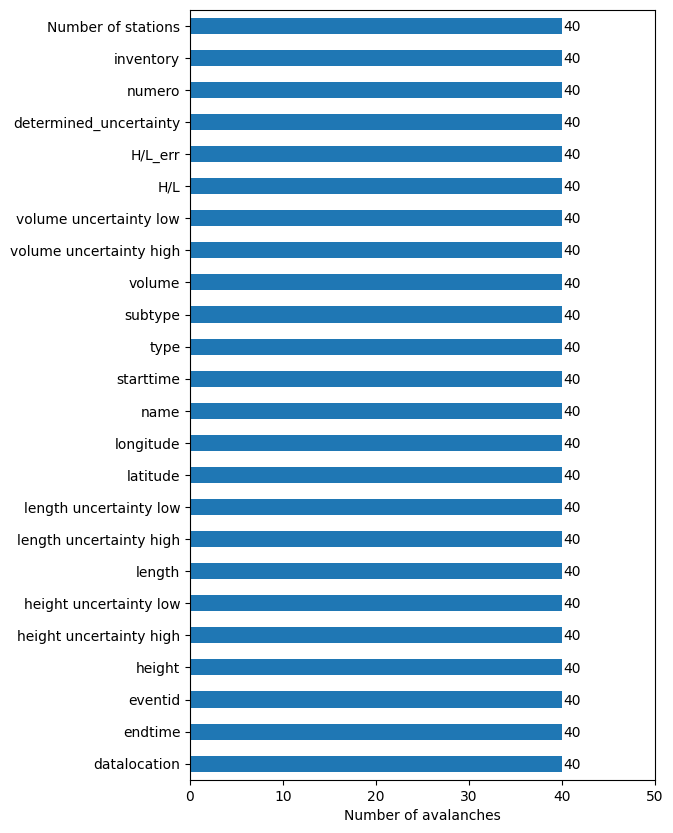

In [2]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_40.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=50)

  0%|          | 0/40 [00:00<?, ?it/s]

-------------------------
Event number 0
-------------------------


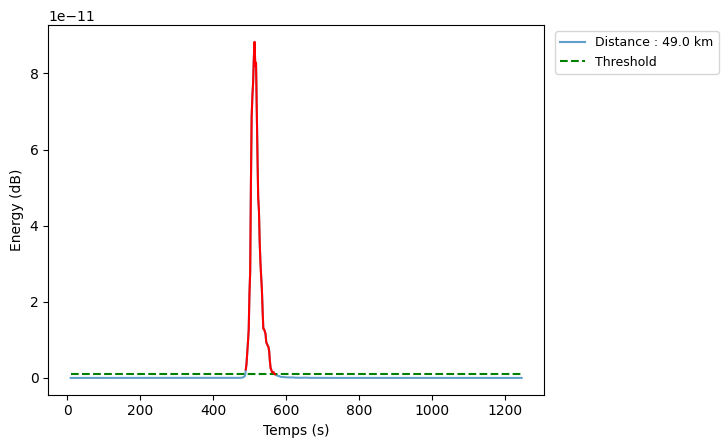

-------------------------
Event number 2
-------------------------


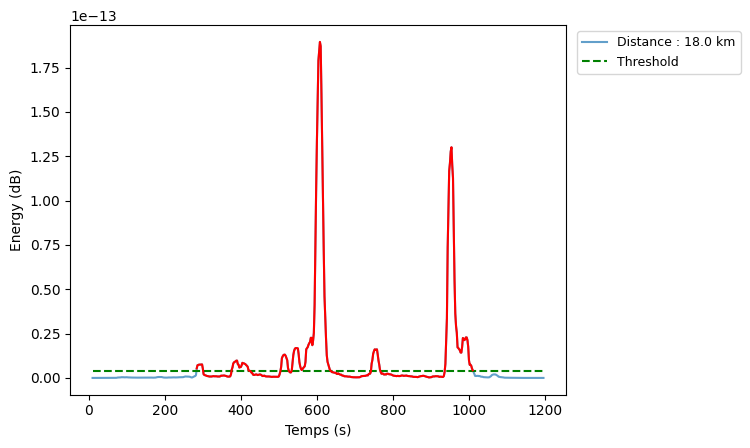

-------------------------
Event number 3
-------------------------


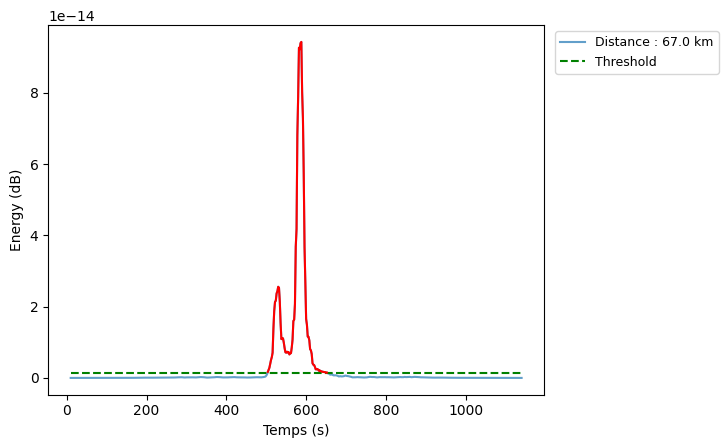

-------------------------
Event number 5
-------------------------


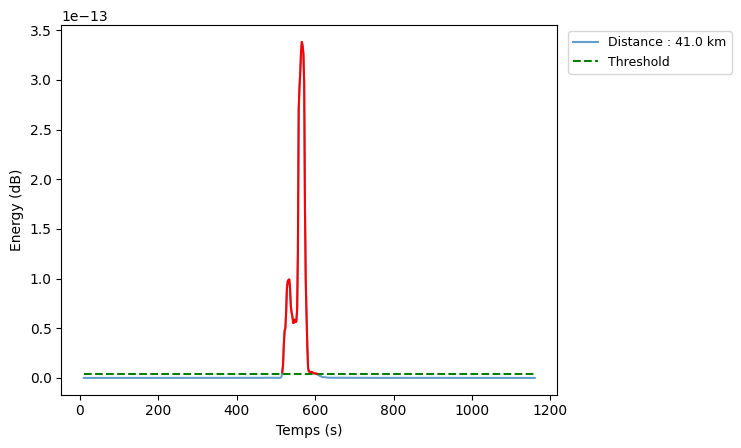

-------------------------
Event number 6
-------------------------


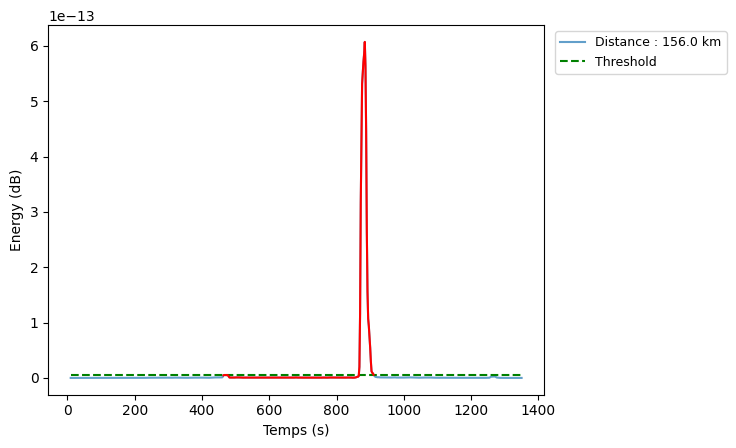

-------------------------
Event number 8
-------------------------


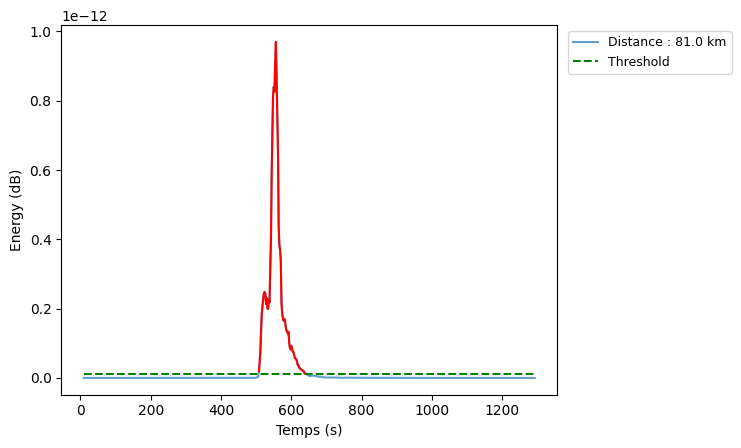

-------------------------
Event number 9
-------------------------


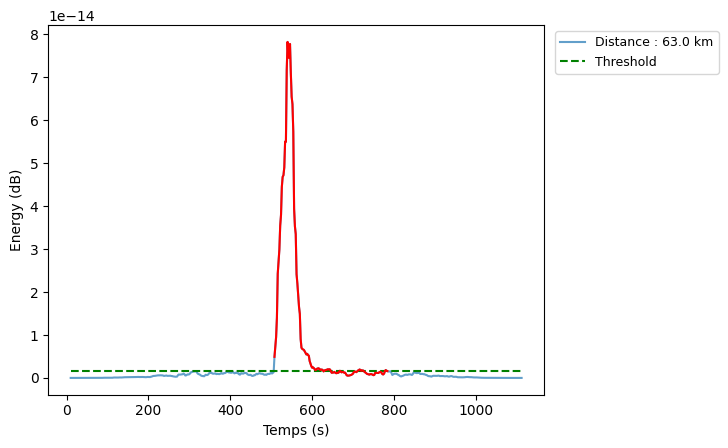

-------------------------
Event number 10
-------------------------


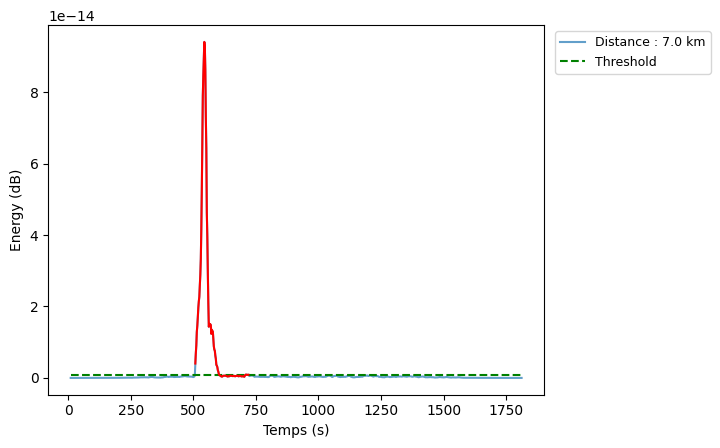

-------------------------
Event number 11
-------------------------


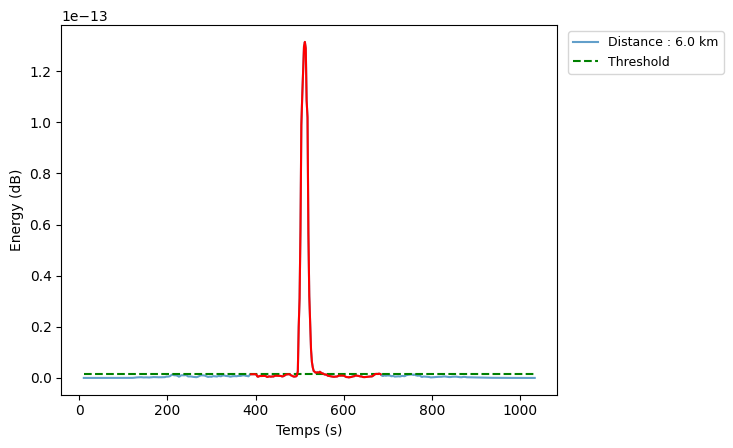

-------------------------
Event number 21
-------------------------


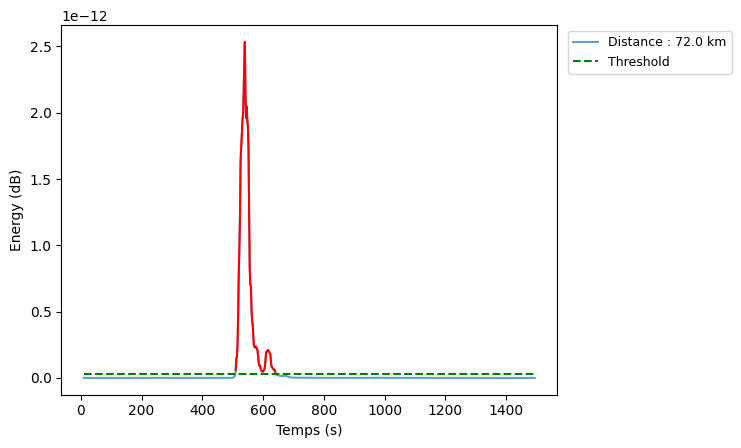

-------------------------
Event number 22
-------------------------


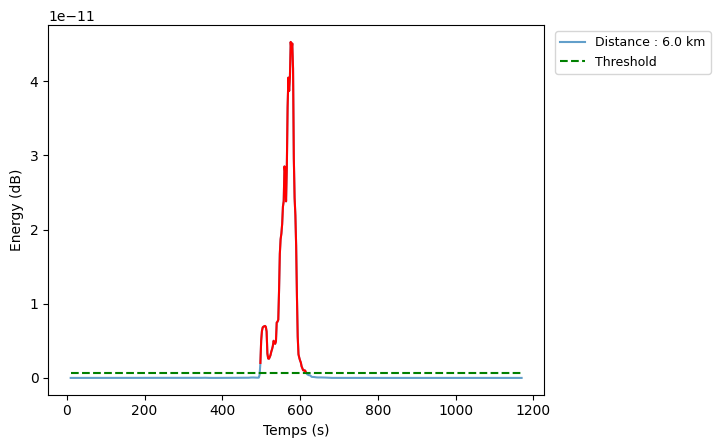

-------------------------
Event number 23
-------------------------


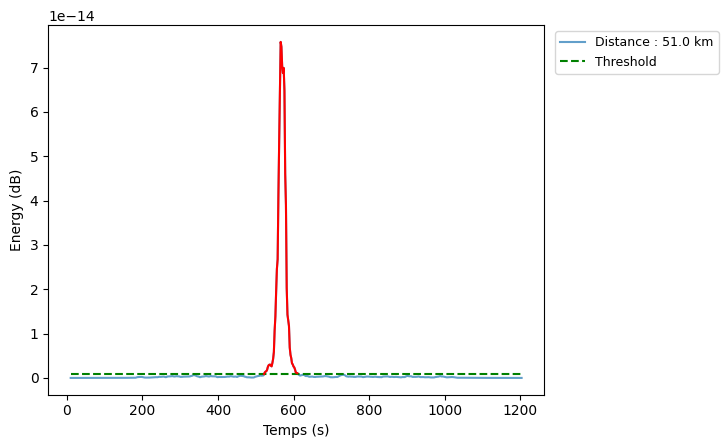

-------------------------
Event number 24
-------------------------


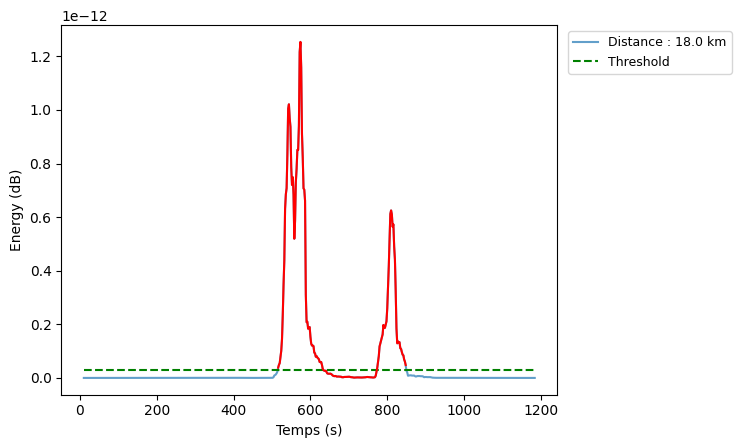

-------------------------
Event number 27
-------------------------


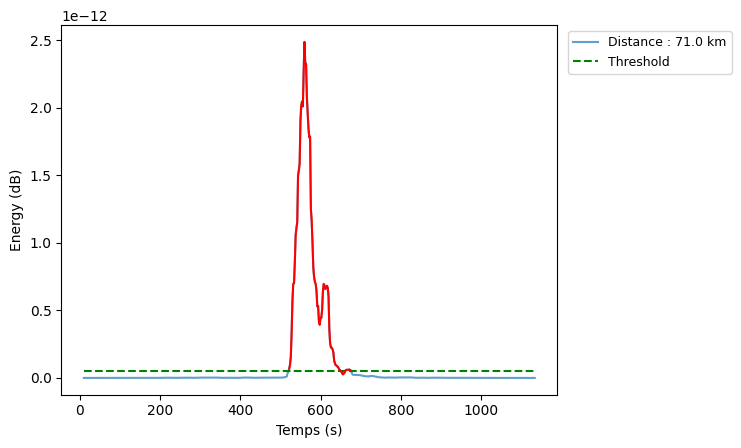

-------------------------
Event number 28
-------------------------


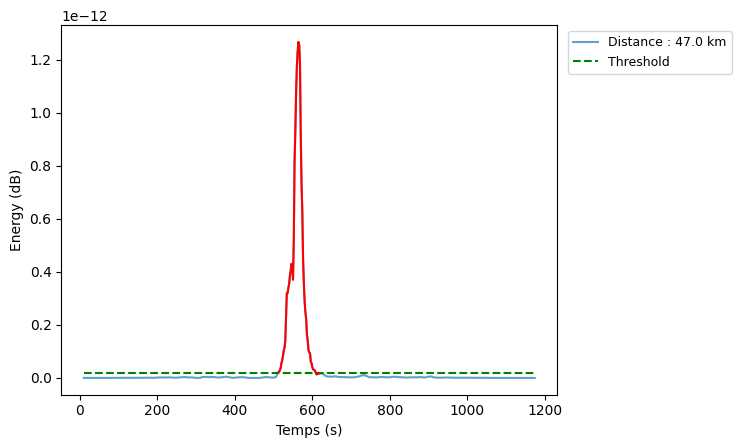

-------------------------
Event number 32
-------------------------


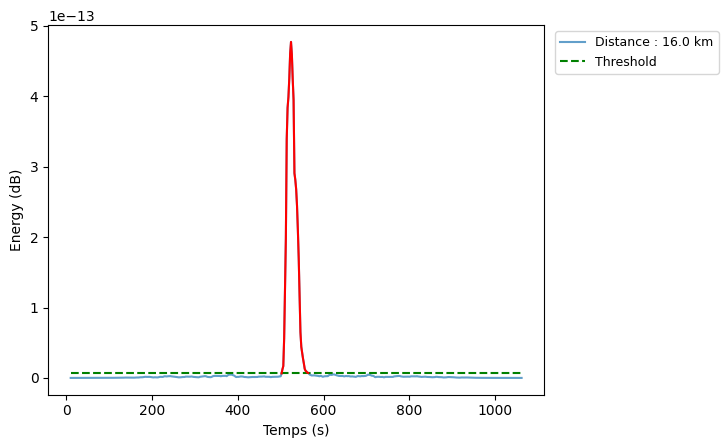

-------------------------
Event number 36
-------------------------


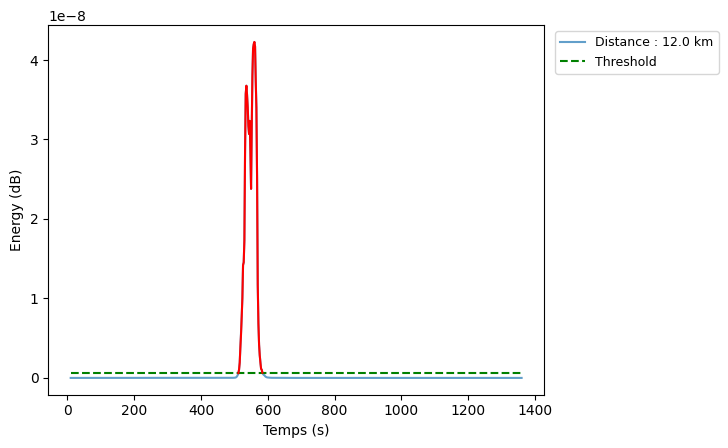

-------------------------
Event number 37
-------------------------


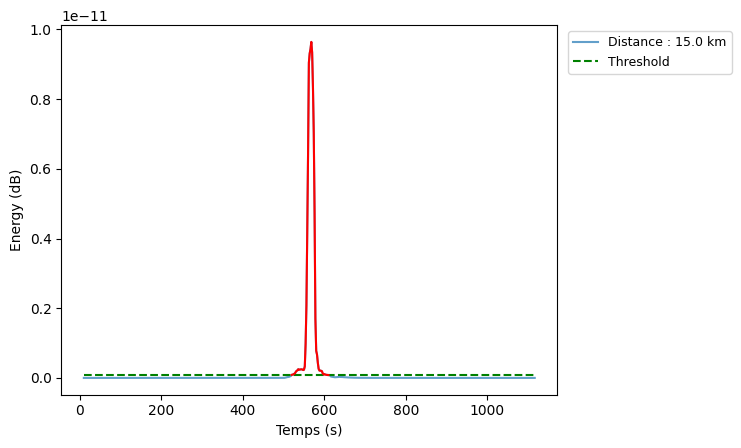

-------------------------
Event number 38
-------------------------


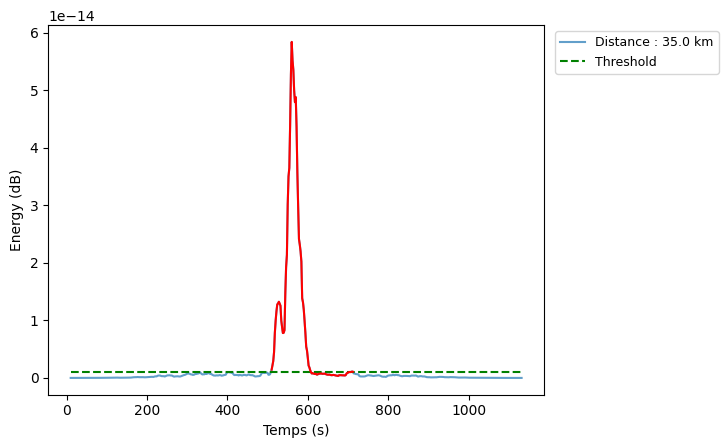

-------------------------
Event number 39
-------------------------


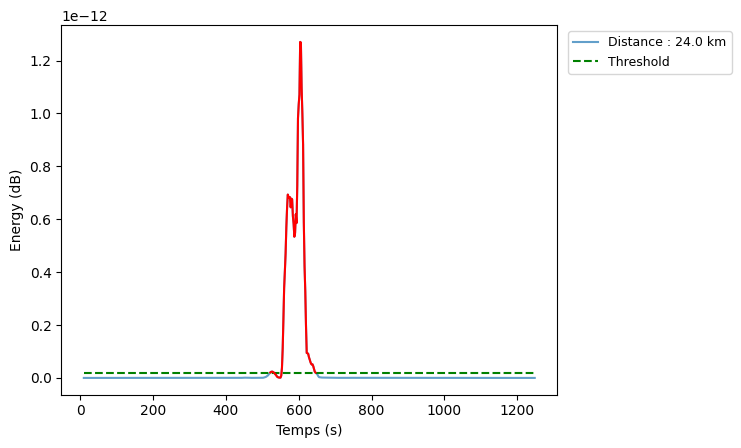

-------------------------
Event number 40
-------------------------


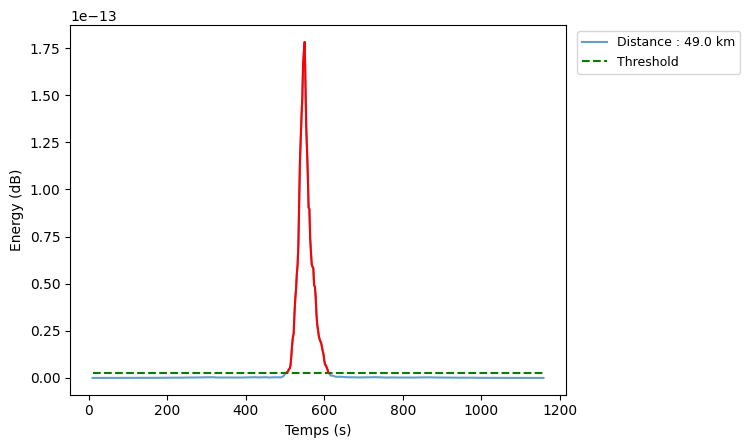

-------------------------
Event number 41
-------------------------


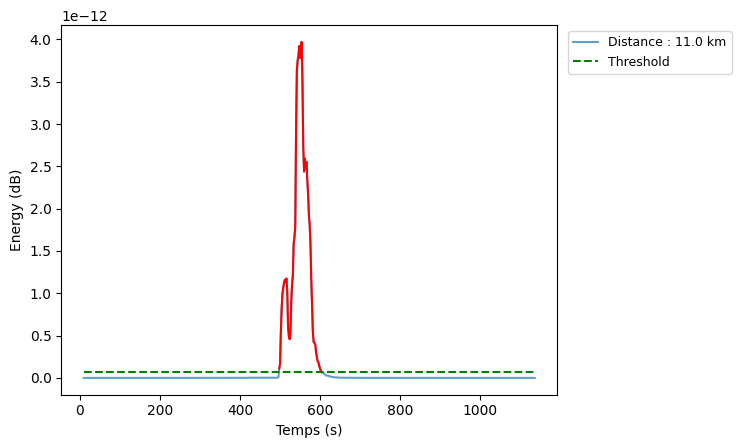

-------------------------
Event number 42
-------------------------


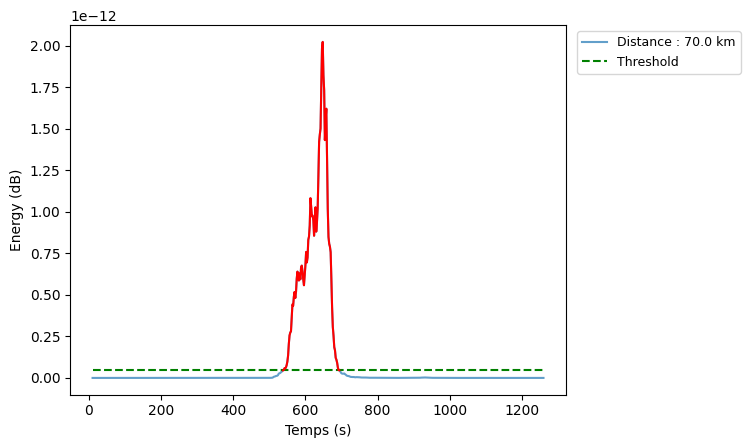

-------------------------
Event number 43
-------------------------


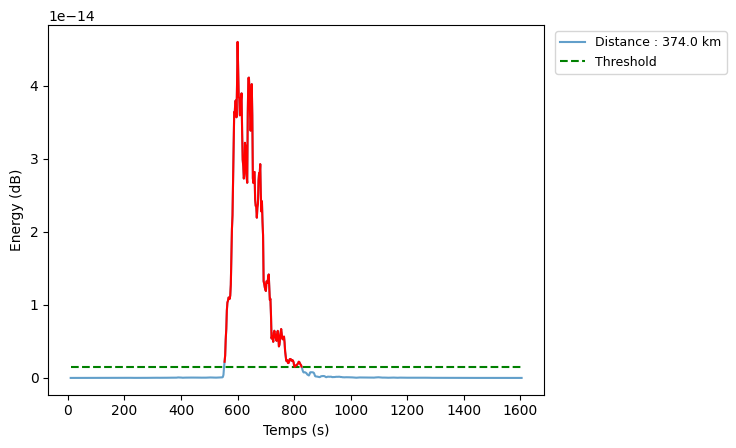

-------------------------
Event number 46
-------------------------


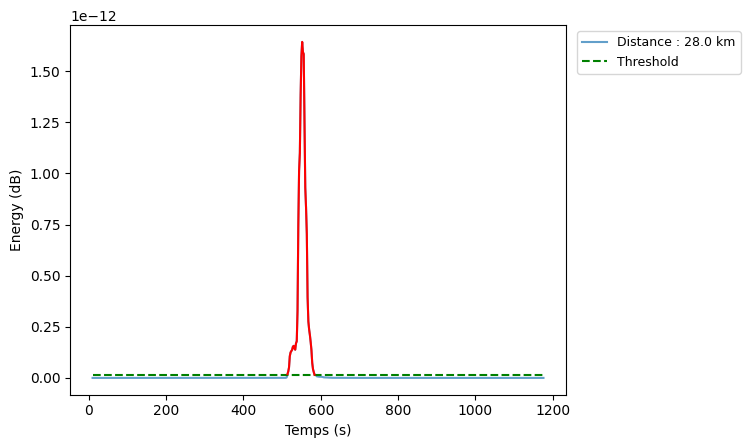

-------------------------
Event number 47
-------------------------


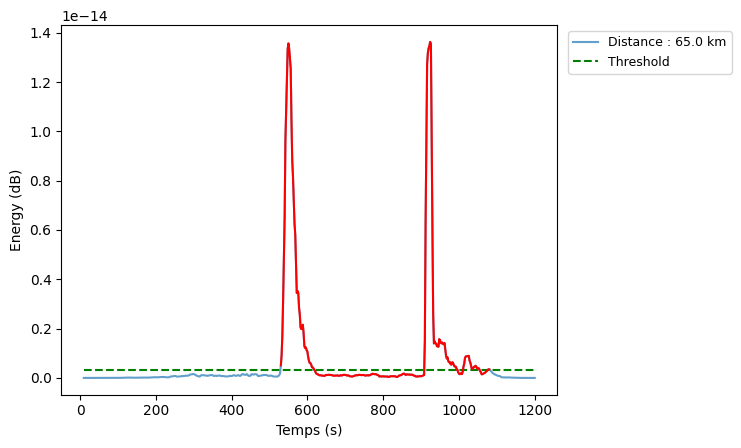

-------------------------
Event number 48
-------------------------


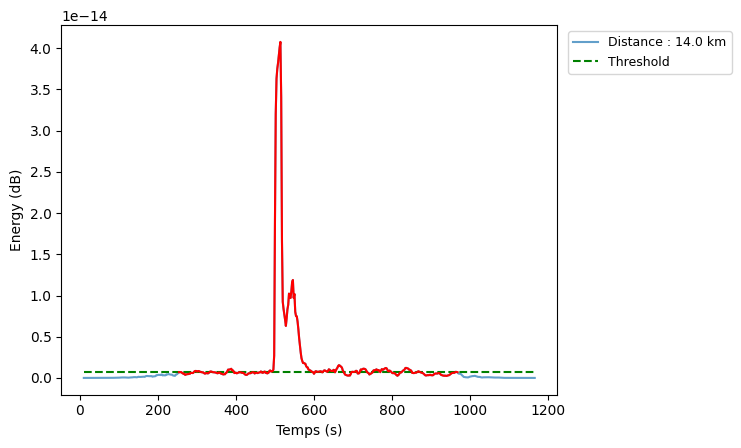

-------------------------
Event number 49
-------------------------


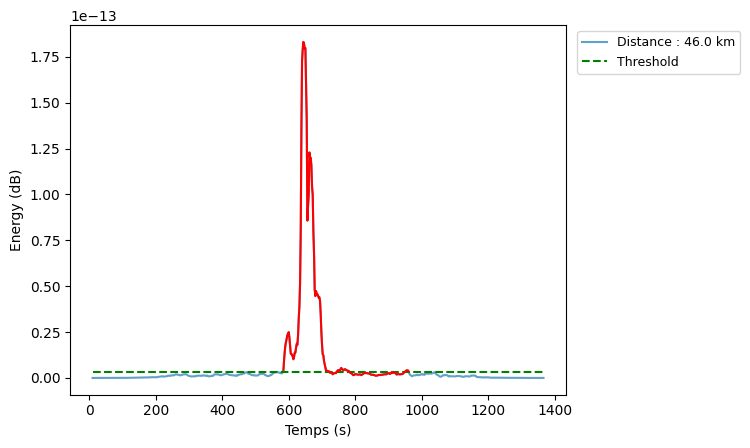

-------------------------
Event number 50
-------------------------


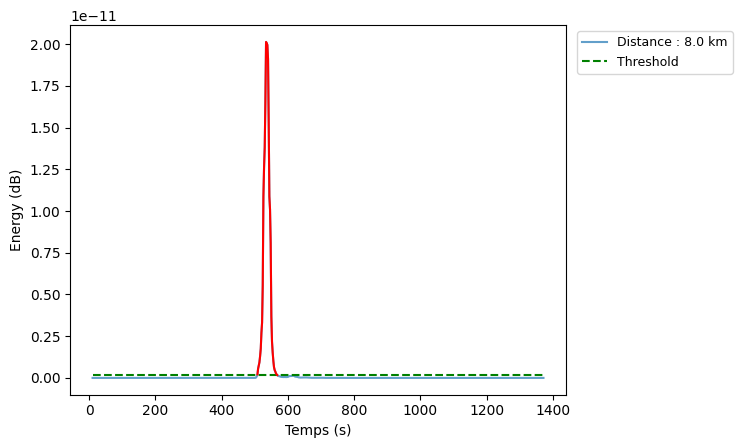

-------------------------
Event number 53
-------------------------


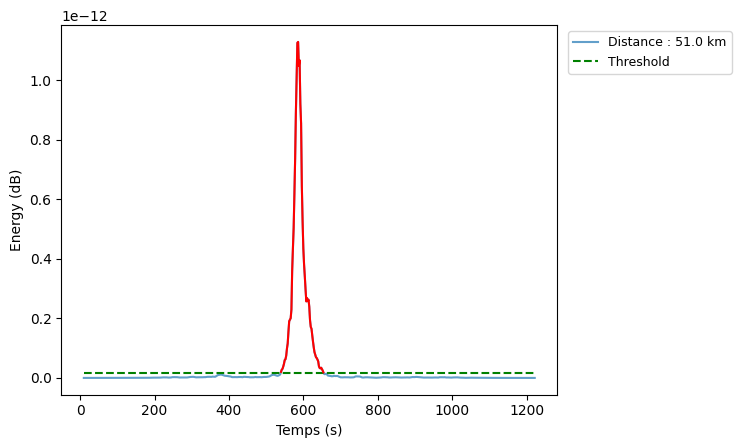

-------------------------
Event number 57
-------------------------


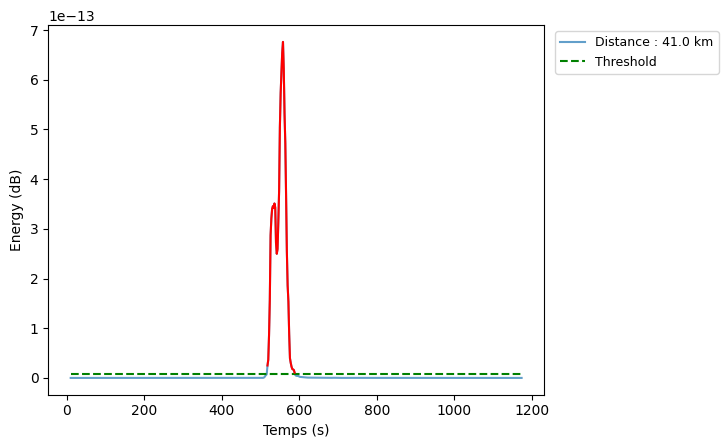

-------------------------
Event number 60
-------------------------


C:\Users\Thibaut\AppData\Roaming\Python\Python310\site-packages\obspy\core\inventory\response.py:988: UserWarning: Input sampling rate of stage 4 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


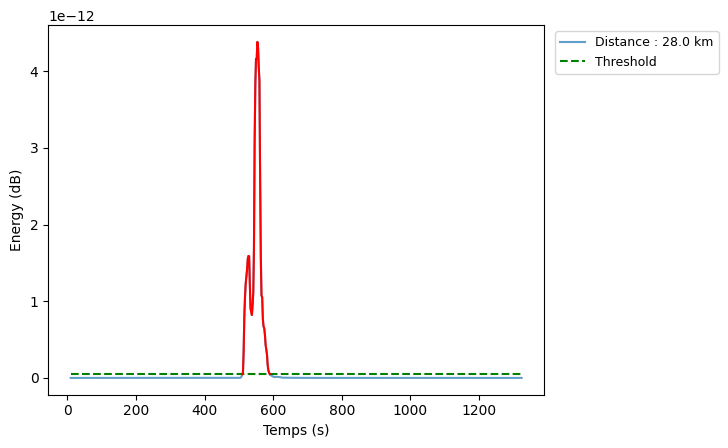

-------------------------
Event number 62
-------------------------


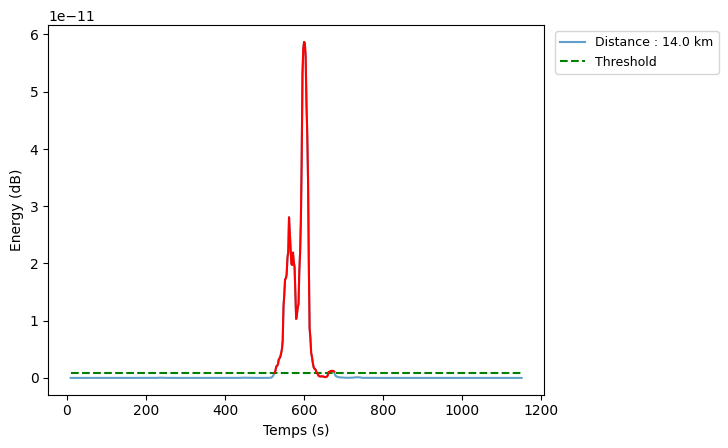

-------------------------
Event number 67
-------------------------


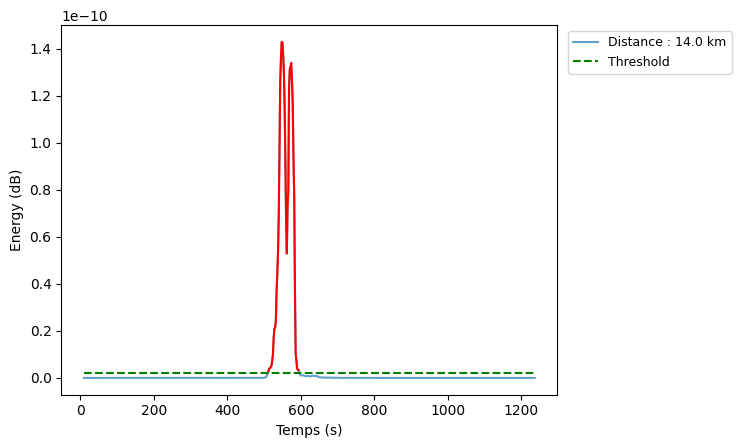

-------------------------
Event number 72
-------------------------


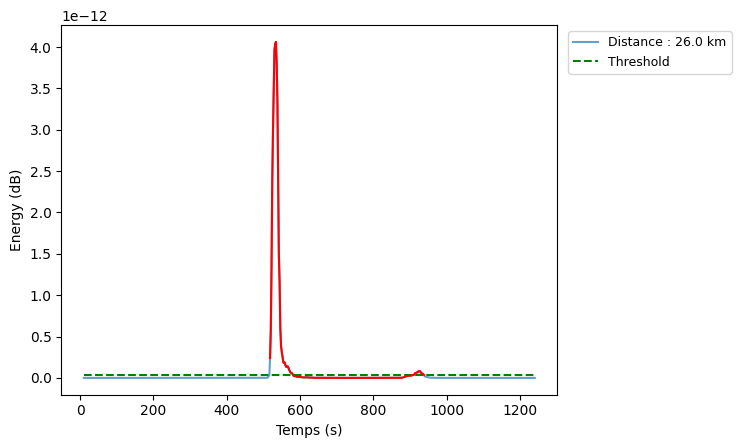

-------------------------
Event number 78
-------------------------


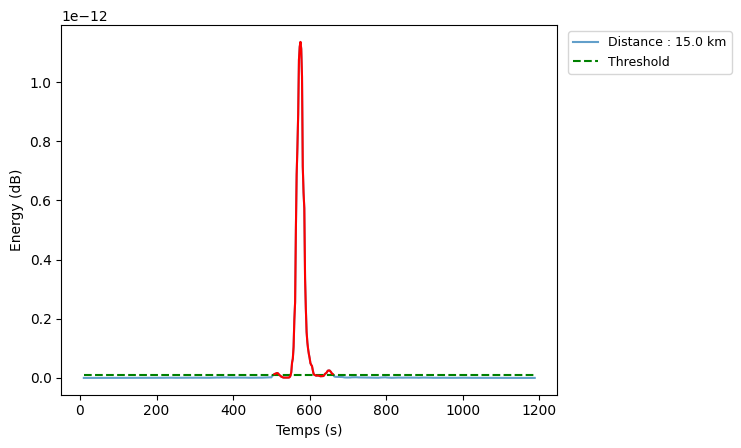

-------------------------
Event number 80
-------------------------


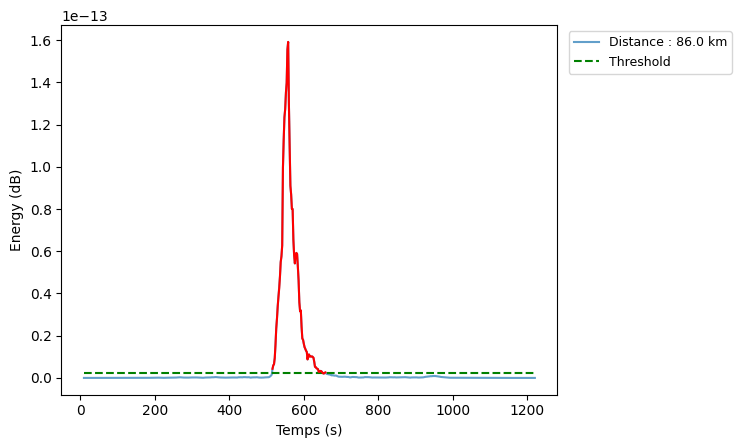

-------------------------
Event number 81
-------------------------


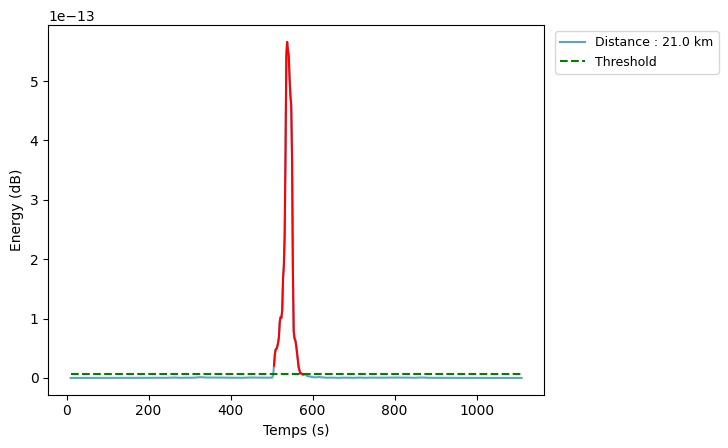

-------------------------
Event number 85
-------------------------


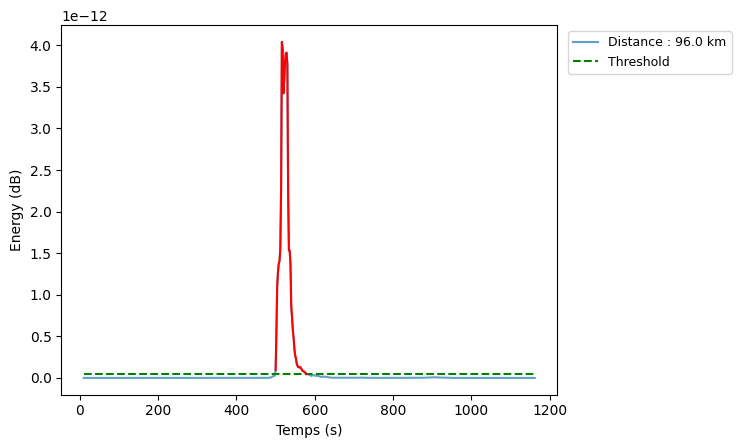

-------------------------
Event number 87
-------------------------


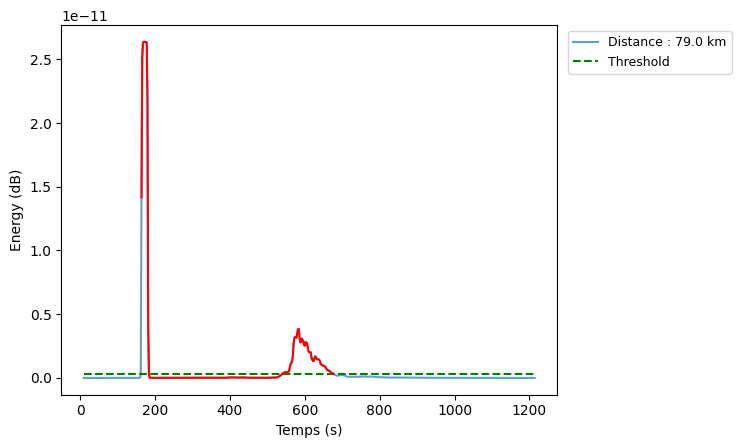

In [3]:
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):

    #if event_index == 0: ## Uncomment this line if you want to see a specific event

        print("-------------------------")
        print("Event number", event_index)
        print("-------------------------")
        
        ## Filter the stream 
        _, stream, _ = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5)

        ## Keep only the first station
        trace = stream[0]
    
        ## Compute the energy and extract features in a dataframe
        energy.compute(ESEC_avalanches, trace, event_index)

## Delete events with incorrectly calculated energy (probably due to site effect, second events or sensor quality)

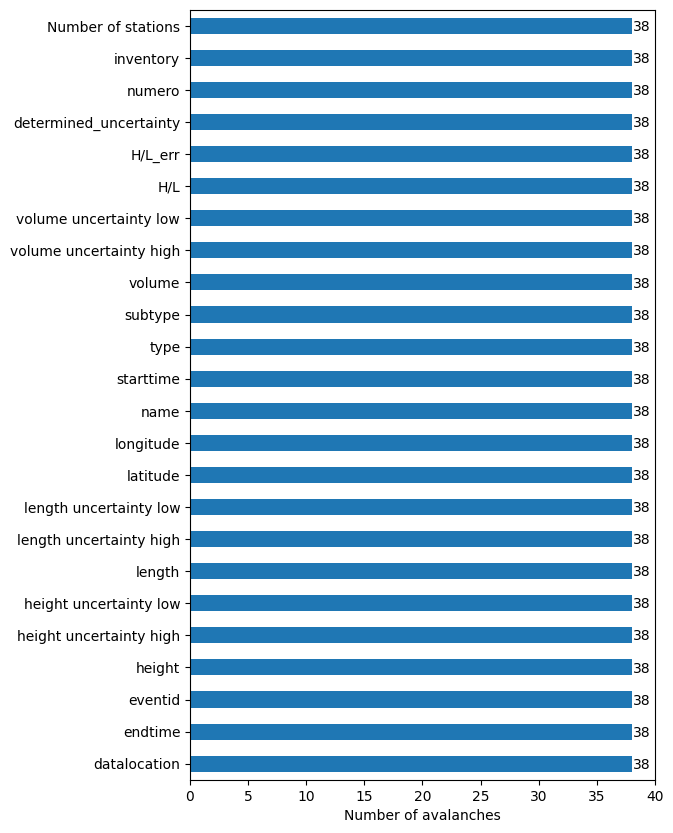

In [4]:
## Remove events
events_to_remove = [47, 87]
ESEC_avalanches = ESEC_avalanches.drop(events_to_remove, axis=0)

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=40)

ESEC_avalanches.to_pickle("catalog/8_ESEC_avalanches_38.pickle")